Install CUDA version of the BLAS libraries

In [ ]:
!apt-get install libcublas11

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcublaslt11
The following NEW packages will be installed:
  libcublas11 libcublaslt11
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 226 MB of archives.
After this operation, 498 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcublaslt11 amd64 11.7.4.6~11.5.1-1ubuntu1 [148 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 libcublas11 amd64 11.7.4.6~11.5.1-1ubuntu1 [78.2 MB]
Fetched 226 MB in 4s (58.1 MB/s)
Selecting previously unselected package libcublaslt11:amd64.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../libcublaslt11_11.7.4.6~11.5.1-1ubuntu1_amd64.deb ...
Unpacking libcublaslt11:amd64 (11.7.4.6~11.5.1-1ubuntu1) ...
Selecting previously unselected package libcublas11:amd64.
P

Install the 'vanilla' pennylane package first.

In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 50.0 MB/s eta 0:00:00


Now we build the "lightning" and "lightning-gpu" device code from source. We could probably use pre-packaged versions but this is what i managed to get working. I'll play with using the pre-packaged versions sometime soon.

In [ ]:
!git clone https://github.com/PennyLaneAI/pennylane-lightning.git

Cloning into 'pennylane-lightning'...
remote: Enumerating objects: 17777, done.
remote: Counting objects: 100% (4901/4901), done.
remote: Compressing objects: 100% (1719/1719), done.
remote: Total 17777 (delta 3894), reused 3928 (delta 3179), pack-reused 12876
Receiving objects: 100% (17777/17777), 5.31 MiB | 18.88 MiB/s, done.
Resolving deltas: 100% (13607/13607), done.


In [ ]:
import os
os.chdir("pennylane-lightning")
!pip install -r requirements.txt
!PL_BACKEND="lightning_qubit" pip install -e . -vv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.9 MB/s eta 0:00:00
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-ewythdts
Initialized build tracking at /tmp/pip-build-tracker-ewythdts
Created build tracker: /tmp/pip-build-tracker-ewythdts
Entered build tracker: /tmp/pip-build-tracker-ewythdts
Created temporary directory: /tmp/pip-install-o1yyft9o
Created temporary directory: /tmp/pip-ephem-wheel-cache-bc37ejbo
Obtaining file:///content/pennylane-lightning
  Added file:///content/pennylane-lightning to build tracker '/tmp/pip-build-tracker-ewythdts'
  Running setup.py (path:/content/pennylane-lightning/setup.py) egg_info for package from file:///content/pennylane-lightning
  C

In [ ]:
!python -m pip install wheel custatevec-cu11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 31.3 MB/s eta 0:00:00


In [ ]:
import os
import site
os.environ["CUQUANTUM_SDK"] = f'{site.getsitepackages()[0]}/cuquantum/lib'

In [ ]:
!PL_BACKEND="lightning_gpu" python -m pip install -e . -vv

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-build-tracker-potldgbh
Initialized build tracking at /tmp/pip-build-tracker-potldgbh
Created build tracker: /tmp/pip-build-tracker-potldgbh
Entered build tracker: /tmp/pip-build-tracker-potldgbh
Created temporary directory: /tmp/pip-install-tmnuqx6s
Created temporary directory: /tmp/pip-ephem-wheel-cache-sl2m9afb
Obtaining file:///content/pennylane-lightning
  Added file:///content/pennylane-lightning to build tracker '/tmp/pip-build-tracker-potldgbh'
  Running setup.py (path:/content/pennylane-lightning/setup.py) egg_info for package from file:///content/pennylane-lightning
  Created temporary directory: /tmp/pip-pip-egg-info-mzcq1g17
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/dist.py:519: InformationOnly: Normalizing '0.34.0-dev27' to '0.34.0.dev27'
    self.metadata.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn
import torch.nn.functional as F

import pennylane as qml
from pennylane import numpy as np

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

Note that here we make use of the "lightning.gpu" device in order to have the pennylane code access the GPU.  Also a couple of lines to test that it's actually doing what's expected.

In [ ]:
n_qubits = 4
if use_cuda is True:
    dev = qml.device("lightning.gpu", wires=n_qubits)
else:
    dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def circuit(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

print(f"{dev=}")

input = torch.from_numpy(np.random.uniform(0, np.pi, (4,))).to(device)
weights = torch.from_numpy(np.random.uniform(0, np.pi, (4, 4))).to(device)
output = circuit(input, weights)
print(f"{output=}")

dev=<LightningGPU device (wires=4, shots=None) at 0x7eff9222c7f0>
output=[tensor(0.5065, dtype=torch.float64), tensor(-0.3005, dtype=torch.float64), tensor(0.1879, dtype=torch.float64), tensor(0.1088, dtype=torch.float64)]


### Load MNIST Dataset

Note that the images are resized to 14x14 here.

In [ ]:
# Loading of the MNIST dataset
transformations = transforms.Compose(
    [transforms.Resize(14),
     transforms.ToTensor()]
)
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transformations,
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transformations
)

100%|██████████| 9912422/9912422 [00:00<00:00, 109037031.95it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39253303.25it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34709443.85it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18787503.72it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Model Hyper-Parameters

In [ ]:
#Setting of the main hyper-parameters of the model
batch_size = 4
n_train = batch_size * 125    # Size of the train dataset
n_test = batch_size * 25     # Size of the test dataset
n_channels = 4
initial_lr = 0.003          # Define your initial learning rate
num_epochs = 40

Note that in the 'quanv' function we need to copy the 'image' and 'weights' data to the CPU memory before converting to numpy arrays. There may be scope for further optimisation here but at the moment it seems that the PyTorch code requires it.

In [ ]:
def quanv(image, weights):
    """Convolves the input image with many applications of the same quantum circuit."""
    # PyTorch models generally require a 4D input tensor with the
    # dimensions - (batch size, channels, height, width)
    # input image shape is (batch_size, 1, 14, 14)
    # output shape should be (batch_size, 4, 7, 7)
    out = np.zeros((batch_size, 4, 7, 7))
    l_image = image.detach().cpu().numpy()
    l_weights = weights.detach().cpu().numpy()

    for i in range(batch_size):
        # Loop over the coordinates of the top-left pixel of 2X2 squares
        for j in range(0, 14, 2):
            for k in range(0, 14, 2):
                # Process a squared 2x2 region of the image with a quantum circuit
                q_results = circuit(
                    [
                        l_image[i, 0, j, k] * np.pi,
                        l_image[i, 0, j, k + 1] * np.pi,
                        l_image[i, 0, j + 1, k] * np.pi,
                        l_image[i, 0, j + 1, k + 1] * np.pi
                    ],
                    l_weights
                )
                # Assign expectation values to different channels of the output pixel (j/2, k/2)
                for c in range(n_channels):
                    out[i, c, j // 2, k // 2] = q_results[c]
    return out

Note that in the HybridFunction.forward method we need to copy the output from 'quanv' to GPU memory. That's done by the '.to(device)' call.  Likewise for the initial values of the 'weights' parameters.

In [ ]:
# Custom nn.Module class for handling the quantum convolution
class QuantConv(nn.Module):

    # The number of layers in the BasicEntanglerLayers instance in
    # the quantum convolver
    LAYERS = 4

    def __init__(self):
        super(QuantConv, self).__init__()
        # Initialise and register weights
        # weights have shape (LAYERS, n_qubits) where LAYERS is the
        # number of layers in the BasicEntanglerLayers
        self.weights = nn.Parameter(
            torch.from_numpy(np.random.uniform(
                0, np.pi, (QuantConv.LAYERS, n_qubits)))).to(device)

    def forward(self, input):
        expectation_z = quanv(input, self.weights)
        x = torch.tensor(expectation_z).to(device)
        return x


In [ ]:
class QuantModel(nn.Module):
    def __init__(self):
        super(QuantModel, self).__init__()
        self.qconv = QuantConv()
        self.fc1 = nn.Linear(4 * 7 * 7, 10)
        self.double()

    def forward(self, x):
        # Propagate the input through the CNN layers
        x = self.qconv(x)
        # Flatten the output from the convolutional layer
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        return x

The following isn't strictly necessary but it makes for a 'sanity' check on the code. Note that inputs and labels are copied to GPU memory before calling quanv. This is also done in the training loop.

In [ ]:
# Run the quanv function on a batch of images
dataset  = train_data
train_size = n_train
train_set, val_set = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
for data in train_loader:
    inputs, labels = data
    print(f"{inputs.shape=}")
    print(f"{labels=}")
    labels = labels.repeat_interleave(n_channels)
    inputs, labels = inputs.to(device), labels.to(device)
    weights = torch.from_numpy(np.random.uniform(0, np.pi, (4, 4)))
    outputs = quanv(inputs, weights)
    print(f"Repeated {labels=}")
    print(f"{outputs.shape=}")
    #print(f"{outputs=}")
    break

inputs.shape=torch.Size([4, 1, 14, 14])
labels=tensor([6, 7, 7, 2])
Repeated labels=tensor([6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2], device='cuda:0')
outputs.shape=(4, 4, 7, 7)


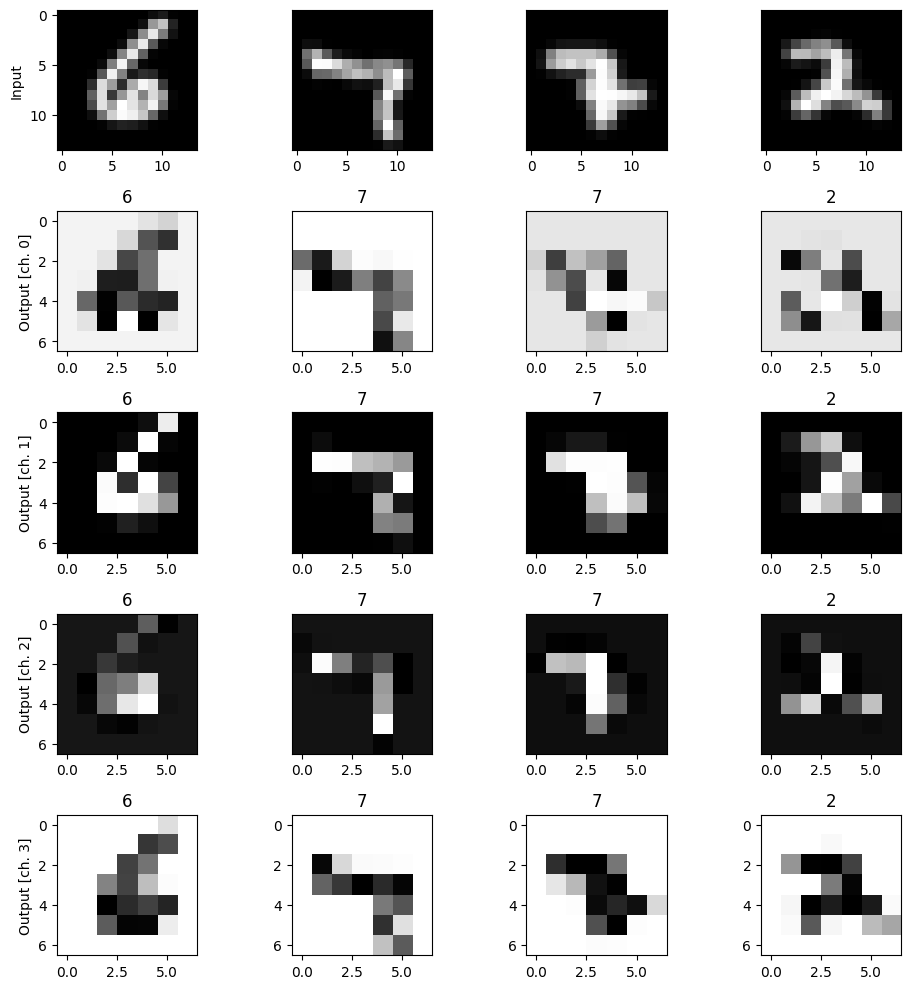

In [ ]:
# Visualise the inputs/outputs from the quanv function
l_inputs = inputs.cpu()
n_samples = 4
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(l_inputs[k, 0, :, :], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].set_title(f"{labels[c+(k*n_samples)]}")
        axes[c + 1, k].imshow(outputs[k, c, :, :], cmap="gray")

plt.tight_layout()
plt.show()

### Create Data Loaders

Data loaders for both the training and test/validation datasets are created here. In both cases, a random selection of n_train and n_test objects are taken from the full MNIST dataset.

The indices of the selected objects are saved to a file ("dataset_indices.pt") so they can be reused at a later time if desired. The REGENERATE_INDICES_FILE should be set to *False* if a previously saved set of dataset indices is to be used and set to *True* if a new randomly selected set of indices should be used.

Note that on colab, any saved index files should be downloaded to your local computer since colab will delete such files when the session is disconnected.

In [ ]:

import os
from pathlib import Path
from torch.utils.data import Subset, DataLoader

os.chdir("/content")

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

REGENERATE_INDICES_FILE = False

SUBSET_INDICES_FILE = Path("dataset_indices.pt")
# Randomly generate indexes for the training and test/validation
# images from the overall dataset. This only needs to be done
# once with subsequent runs reading the indices from the saved file.
#
if REGENERATE_INDICES_FILE is True:
    train_indices = torch.randint(0, len(train_data), (n_train,))
    test_indices = torch.randint(0, len(test_data), (n_test,))
    torch.save({"train_indices": train_indices, "test_indices": test_indices},
              SUBSET_INDICES_FILE)
subset_indices_dict = torch.load(SUBSET_INDICES_FILE)

train_subset = Subset(train_data, subset_indices_dict['train_indices'])
test_subset = Subset(test_data, subset_indices_dict['test_indices'])

train_loader = DataLoader(train_subset, shuffle=False, batch_size=batch_size)
val_loader = DataLoader(test_subset, shuffle=False, batch_size=batch_size)
print(f"{len(train_subset)=}")
print(f"{len(test_subset)=}")

len(train_subset)=500
len(test_subset)=100


### Training Loop

In [ ]:
import datetime
from pathlib import Path
import time

dataset  = train_data

# Initialize your QCNN model
cnn = QuantModel().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(cnn.parameters(), lr=initial_lr,
                      momentum=0.9)  # Stochastic Gradient Descent optimizer

# Create a learning rate scheduler
# Here, we use StepLR which reduces the learning rate by a factor every step_size epochs
#
# Setting step_size = 1.0 will effectively disable the scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.0)

train_loader = DataLoader(train_subset, shuffle=False, batch_size=batch_size)

MODEL_NAME = "ImgClass-Quanvolv.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

RESUME_TRAINING = False

if RESUME_TRAINING is True:
    print(f"Restore model state from {MODEL_SAVE_PATH}")
    model_dict = torch.load(MODEL_SAVE_PATH)
    initial_epoch = model_dict['epoch'] + 1
    cnn.load_state_dict(model_dict['model_state_dict'])
    optimizer.load_state_dict(model_dict['optimizer_state_dict'])
    loss_list = model_dict['loss'].copy()
else:
    initial_epoch = 0
    loss_list = []

for epoch in range(initial_epoch, num_epochs):
    cnn.train()
    ct = datetime.datetime.now()
    lr = scheduler.get_last_lr()
    print(f"{epoch=}, {lr=}, {ct}")
    running_loss = []
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()  # Zero the parameter gradients to avoid accumulation
        outputs = cnn(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagation
        running_loss.append(loss.item())
        optimizer.step()  # Update the model parameters
    loss_list.append(sum(running_loss)/len(running_loss))

    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(100. * (epoch + 1) / num_epochs, loss_list[-1]))
    torch.save({
        'epoch': epoch,
        'model_state_dict': cnn.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss_list,
    }, MODEL_SAVE_PATH)
    print(f"Saving model state to {MODEL_SAVE_PATH}")

    val_loader = DataLoader(test_subset, shuffle=False, batch_size=batch_size)
    correct = 0
    total = 0
    # Set the model to evaluation mode
    cnn.eval()
    with torch.inference_mode():
        for data in val_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = cnn(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Accuracy on the validation set: {100 * correct / total:.2f}%')

    # Decay Learning Rate
    scheduler.step()
print('Finished Training')

### Model Inference

The problem with the 'IndexError' exception has now been fixed.

In [ ]:


#accuracy

# Use a small subset of the full validation dataset
from torch.utils.data import SubsetRandomSampler

K = n_test # enter your length here
subsample_train_indices = torch.randperm(len(val_set))[:K]
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, sampler=SubsetRandomSampler(subsample_train_indices))

correct = 0
total = 0
# Set the model to evaluation mode
cnn.eval()
with torch.inference_mode():
    for data in val_loader:
        images, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy on the validation set: {100 * correct / total:.2f}%')